In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#load the data
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
#columns to remove : area_type,availability,society,balcony
df = df.drop(["area_type","availability","society","balcony"],axis=1)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


Handling Missing Values

In [5]:
#Handling missing values in location
df["location"].value_counts()
#Mostly repeated locations are:  Whitefield, Sarjapur  Road

df["location"] = df["location"].fillna("Sarjapur  Road")

In [6]:
#Handling nan values in size column
#Here mostly repeated bhk is 2 BHk 
df["size"] = df["size"].fillna("2 BHK")

In [7]:
#Handling nan values in bath
med = df["bath"].median()
df["bath"] = df["bath"].fillna(med)
df["bath"] = df["bath"].astype(int)

In [8]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
#Handling Size column
def clean_size(size):
    return int(size.split()[0])

df["bhk"] = df["size"].apply(clean_size)

df["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [10]:
#Handling location column
#--> convert all the locations with count less than 10 into others category
loc = df["location"].value_counts()
loc_less_than_10  = loc[loc<=10]

def clean_location(location):
    if location in loc_less_than_10:
        return "Others"
    else:
        return location

df["location"] = df["location"].apply(clean_location)

In [11]:
#Handling total sqft column
def clean_sqft(sqft):
    l = sqft.split("-")
    if len(l)==2:
        return float(l[0])+float(l[1])/2
    try:
        return float(l[0])
    except:
        return None
    
df["total_sqft"] = df["total_sqft"].apply(clean_sqft)
df["total_sqft"] = df["total_sqft"].fillna(round(df["total_sqft"].mean()))


Handling Outliers

In [12]:
#create price_per_sqft
#formula :  price/total_sqft
df["price_per_sqft"] = df["price"]*100000/df["total_sqft"]

In [13]:
#Handling outliers in total_sqft
#Note: here there are some houses with less than 300 sqft (ouliers)
# formula:  total_sqft/bhk >=300  #to keep only realistic rows

df = df[df["total_sqft"]/df["bhk"]>=300]

df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12572.000000,12572.000000,12572.000000,12572.000000,12572.000000
mean,1607.791929,2.559975,111.466738,2.650811,6286.353990
std,1275.842578,1.078856,151.965217,0.977557,4186.300231
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1120.000000,2.000000,49.000000,2.000000,4177.436629
50%,1305.000000,2.000000,70.000000,3.000000,5274.725275
75%,1710.000000,3.000000,115.000000,3.000000,6904.652015
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


<Axes: xlabel='bhk'>

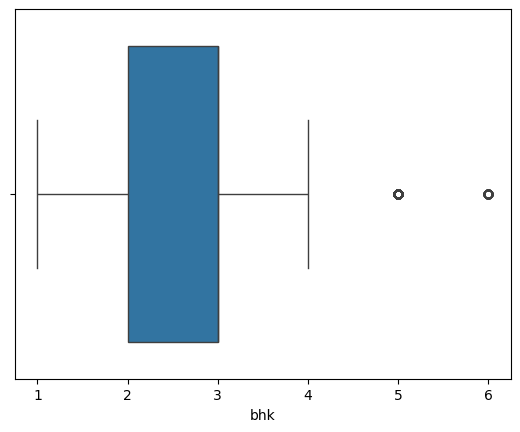

In [14]:
#handling outliers in BHK
df = df[df["bhk"]<=6]
sns.boxplot(x="bhk",data=df)

In [15]:
#Handling outliers in bath column
#Realistic ---> no.of.bath<bhk+2
# 1bhk ---> 2
# 2bhk ---> 3
# 3bhk ---> 5

#unrealistic
#1bhk  ---> 4 bath
#2bhk  ---> 5 bath

# bath<bhk+2  to keep realistic bath counts

df = df[df["bath"]<df["bhk"]+2]
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689.834926
13316,Others,4 BHK,3600.0,5,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407.336319


<Axes: xlabel='price_per_sqft'>

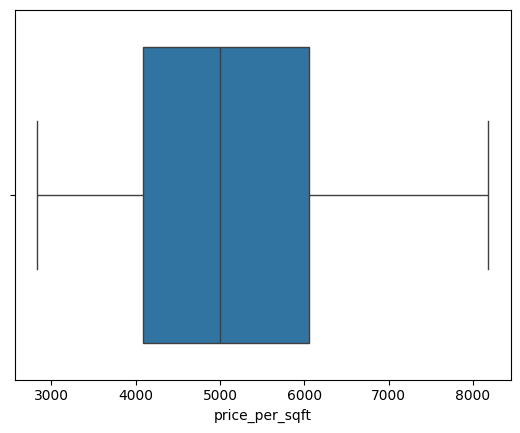

In [16]:
#Handling outliers in price per sqft
#IQR method --->outlier handling method
q1 = df["price_per_sqft"].quantile(0.25)
q3 = df["price_per_sqft"].quantile(0.75)
IQR = q3-q1

lower  = q1-0.5*IQR  #0.5/1.0/1.5/2.0 threshold (to detect outliers)
upper  = q3+0.5*IQR

df = df[(df["price_per_sqft"]>=lower) & (df["price_per_sqft"]<=upper)]
sns.boxplot(x="price_per_sqft",data=df)

In [17]:
#Removing duplicate rows
df.drop_duplicates(inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_17336\2873933188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [18]:
#Reset the index
df.reset_index(inplace=True)

In [19]:
#Remove unwanted columns
df = df.drop(["index","price_per_sqft","size"],axis=1)
df

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2,39.07,2
1,Chikka Tirupathi,2600.0,5,120.00,4
2,Uttarahalli,1440.0,2,62.00,3
3,Lingadheeranahalli,1521.0,3,95.00,3
4,Kothanur,1200.0,2,51.00,2
...,...,...,...,...,...
9267,Rachenahalli,1050.0,2,52.71,2
9268,Bellandur,1262.0,2,47.00,2
9269,Green Glen Layout,1715.0,3,112.00,3
9270,Whitefield,3453.0,4,231.00,5


Model Training

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [21]:
#Encoding location
encoder  = LabelEncoder()
df["encoded_loc"] = encoder.fit_transform(df["location"])

In [22]:
#Divide into input and output features
X = df.drop(["location","price"],axis=1)
y = df.price

In [23]:
#splitting into training and testing 
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [24]:
#model training
LR = LinearRegression()
RF = RandomForestRegressor(n_estimators=200,max_depth=6)
LR.fit(Xtrain,ytrain)
RF.fit(Xtrain,ytrain)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",6
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples a

In [25]:
print("Linear Regression model: ")
print("Training Eff: ",LR.score(Xtrain,ytrain))
print("Testing Eff: ",LR.score(Xtest,ytest))

print("Random Forest model: ")
print("Training Eff: ",RF.score(Xtrain,ytrain))
print("Testing Eff: ",RF.score(Xtest,ytest))

Linear Regression model: 
Training Eff:  0.8668155814686588
Testing Eff:  0.8002268159711257
Random Forest model: 
Training Eff:  0.8895970991366984
Testing Eff:  0.8175124954219937


RF model is performing well as compared to linear regression

In [26]:
model  =RandomForestRegressor(random_state=42)
params = {"n_estimators":[100,150,200,250,300],
          "max_depth":[5,6,7]}
grid = GridSearchCV(estimator=model,param_grid=params,cv=5)
grid.fit(Xtrain,ytrain)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestR...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [5, 6, ...], 'n_estimators': [100, 150, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >

In [27]:
print("Best params: ",grid.best_params_)
print("Best score: ",grid.best_score_)

Best params:  {'max_depth': 6, 'n_estimators': 200}
Best score:  0.8333915268615201


In [28]:
print("Training Eff: ",grid.score(Xtrain,ytrain))
print("Testing Eff: ",grid.score(Xtest,ytest))

Training Eff:  0.8878387134577995
Testing Eff:  0.8179955620654915


In [29]:
ypred = grid.predict(Xtest)
ypred

array([124.66041457,  33.2101875 , 235.67025426, ...,  74.22325975,
       135.17217287,  74.15691659], shape=(2782,))

In [30]:
print("R2: ",r2_score(ytest,ypred))
print("MAE: ",mean_absolute_error(ytest,ypred))

R2:  0.8179955620654915
MAE:  14.94120471734884


In [31]:
#save the cleaned df
df.to_csv("cleaned_df.csv")

In [32]:
#save the model
import pickle
with open("RF_model.pkl","wb") as file:
    pickle.dump(grid,file)# save binary data into file